In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/MVS4498/EDA-Projects/main/Project%2012%20-%20Heart%20Disease/Heart.csv")

In [6]:
df.to_csv("heart_disease.csv", index=False)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
#find shape of the dataset 
df.shape


(1025, 14)

In [13]:
#check null values in the data set
df.isnull().sum()
#add another .sum() to get the total number of null values in the data set

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
#to drop duplicate datas
df.drop_duplicates(inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [16]:
#to get stats about the data set 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
#mapping sex as male and female (gender not given in data)
df["gender"]=df.sex.map(lambda x:"male" if x==1 else "female")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,female
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,female
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,male
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,male


<AxesSubplot:>

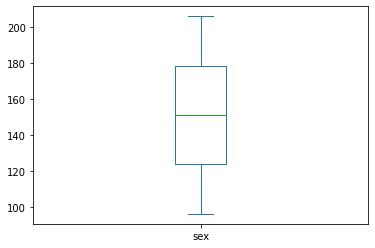

In [32]:
#df.sex.value_counts().plot(kind="box")
df.sex.value_counts().plot(kind="box")

In [52]:

new_col = []
for i,v in zip(df["trestbps"], df["chol"]):
  if (i>135)&(v>170):
    new_col.append(1)
  else:
    new_col.append(0)

df["new_col"]= new_col
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,new_col
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,male,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,male,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,male,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,male,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,female,0
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,female,0
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,male,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,male,1


In [55]:
#gender distribution according to target variable
df.groupby(["target","gender"]).count()

age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  \
target gender                                                                
0      female   24   24   24        24    24   24       24       24     24   
       male    114  114  114       114   114  114      114      114    114   
1      female   72   72   72        72    72   72       72       72     72   
       male     92   92   92        92    92   92       92       92     92   

               oldpeak  slope   ca  thal  new_col  
target gender                                      
0      female       24     24   24    24       24  
       male        114    114  114   114      114  
1      female       72     72   72    72       72  
       male         92     92   92    92       92

In [66]:
df.groupby(["restecg","target"])['age'].count()

restecg  target
0        0         79
         1         68
1        0         56
         1         95
2        0          3
         1          1
Name: age, dtype: int64

In [59]:
import seaborn as sns

<AxesSubplot:xlabel='ca', ylabel='count'>

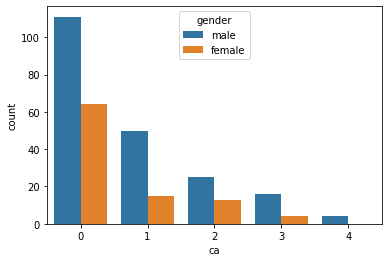

In [63]:
#Find ca Distribution According to The gender Variable
sns.countplot(x="ca",hue="gender",data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


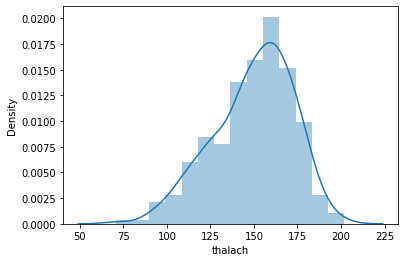

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


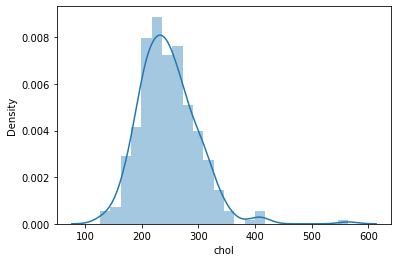

In [75]:
#cheack thalch  and cholestrol distributionin df
sns.distplot(a=df.thalach)
plt.show()
sns.distplot(a=df.chol)
plt.show()

In [76]:
#chest pain type 
df.cp.value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

([<matplotlib.axis.XTick at 0x7ff4dc96d160>,
 [Text(0, 0, 'less'),
  Text(1, 0, 'more'),
  Text(2, 0, 'severe'),
  Text(3, 0, 'verysevere')])

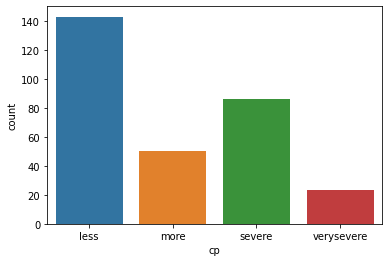

In [77]:
sns.countplot(x="cp",data=df)
plt.xticks([0,1,2,3,],["less","more","severe","verysevere"])

<AxesSubplot:xlabel='cp', ylabel='count'>

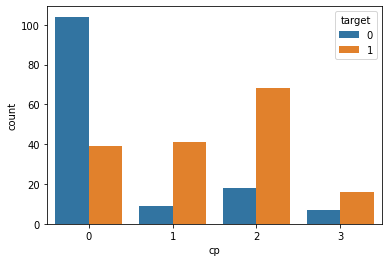

In [79]:
#The Chest Pain Distribution As Per target Variable
sns.countplot(x="cp",hue="target",data=df)

<AxesSubplot:xlabel='fbs', ylabel='count'>

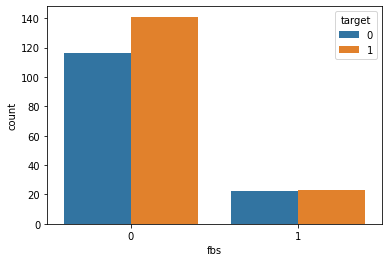

In [80]:
 #Fasting Blood Sugar Distribution According To Target Variable
 sns.countplot(x="fbs",hue="target",data=df)

In [81]:
#check resting bp
df.trestbps.value_counts()

120    37
130    36
140    32
110    19
150    17
138    12
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
152     5
134     5
145     5
122     4
100     4
170     4
115     3
136     3
180     3
126     3
142     3
105     3
144     2
102     2
94      2
146     2
178     2
148     2
174     1
165     1
156     1
164     1
172     1
155     1
114     1
200     1
154     1
106     1
104     1
192     1
129     1
117     1
123     1
101     1
Name: trestbps, dtype: int64

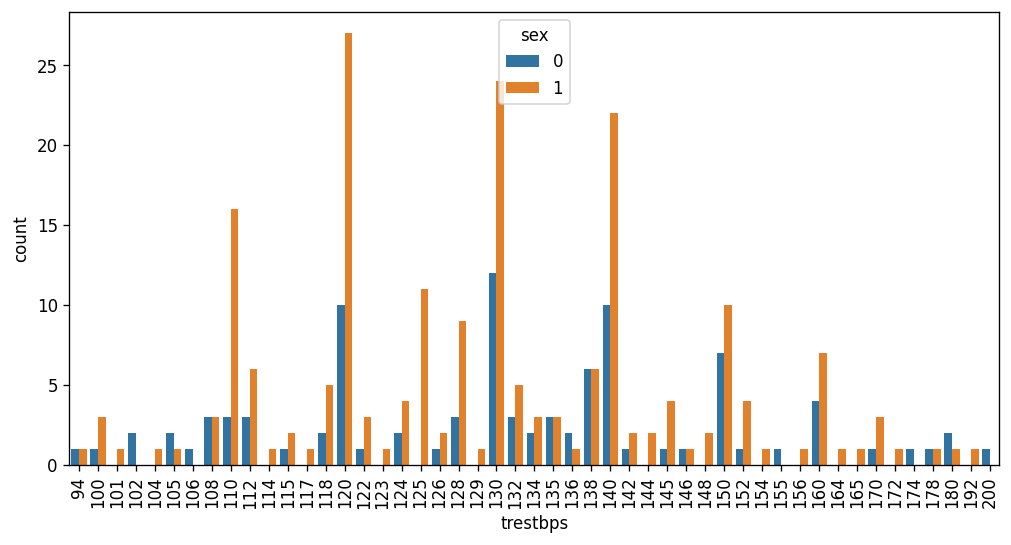

In [92]:
#Compare Resting Blood Pressure As Per Sex Column
plt.figure(figsize=(10,5),dpi=120)
sns.countplot(x="trestbps",hue="sex",data=df)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

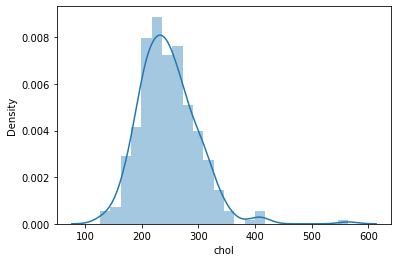

In [87]:
#Show Distribution of Serum cholesterol
sns.distplot(a=df.chol)

<AxesSubplot:>

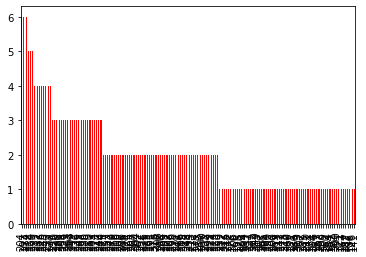

In [90]:
#Plot Continuous Variables
df.chol.value_counts().plot(kind="bar",color="red")